In [6]:
# set up Python environment: numpy for numerical routines, and matplotlib for plotting
import numpy as np
import matplotlib.pyplot as plt
# display plots in this notebook
%matplotlib inline

# set display defaults
plt.rcParams['figure.figsize'] = (10, 10)        # large images
plt.rcParams['image.interpolation'] = 'nearest'  # don't interpolate: show square pixels
plt.rcParams['image.cmap'] = 'gray'  # use grayscale output rather than a (potentially misleading) color heatmap

In [7]:
# The caffe module needs to be on the Python path;
#  we'll add it here explicitly.
import sys
caffe_root = '../../caffe/'  # this file should be run from {caffe_root} (otherwise change this line)
sys.path.insert(0, caffe_root + 'python')

import caffe
# If you get "No module named _caffe", either you have not built pycaffe or you have the wrong path.

In [8]:
import os    
if os.path.isfile('./models/snapshots/itracker_iter_92000.caffemodel'): 
    print ('Caffemodel found.')
else:
    print ('Caffemodel not found')

Caffemodel found.


In [9]:
caffe.set_mode_cpu()

model_def = './models/itracker_deploy.prototxt'
# change to itracker25x_iter_92000.caffemodel for augmented dataset trained parameters, itracker_iter_92000.caffemodel for model parameters from unaugmented dataset
model_weights = './models/snapshots/itracker_iter_92000.caffemodel'

net = caffe.Net(model_def,      # defines the structure of the model
                model_weights,  # contains the trained weights
                caffe.TEST)     # use test mode (e.g., don't perform dropout)

In [10]:
# for reading .mat files
import scipy.io


In [33]:

# load the mean images
mu_face = scipy.io.loadmat('./models/mean_images/mean_face_224.mat')
mu_right = scipy.io.loadmat('./models/mean_images/mean_right_224.mat')
mu_left = scipy.io.loadmat('./models/mean_images/mean_left_224.mat')

# average over pixels to obtain the mean (RGB) pixel values
mu_face = mu_face['image_mean'].mean(0).mean(0)
mu_right = mu_right['image_mean'].mean(0).mean(0)  
mu_left = mu_left['image_mean'].mean(0).mean(0)  
print(mu_face.shape)

(3,)


In [34]:
# create transformers for the input data
transformer_image_face = caffe.io.Transformer({'image_face': net.blobs['image_face'].data.shape})
transformer_image_right = caffe.io.Transformer({'image_right': net.blobs['image_right'].data.shape})
transformer_image_left = caffe.io.Transformer({'image_left': net.blobs['image_left'].data.shape})
transformer_facegrid = caffe.io.Transformer({'facegrid': net.blobs['facegrid'].data.shape})



In [35]:
# move image channels to outermost dimension
transformer_image_face.set_transpose('image_face', (2,0,1))
transformer_image_right.set_transpose('image_right', (2,0,1))
transformer_image_left.set_transpose('image_left', (2,0,1))

In [36]:
# subtract the dataset-mean value in each channel
transformer_image_face.set_mean('image_face', mu_face) 
transformer_image_right.set_mean('image_right', mu_right)
transformer_image_left.set_mean('image_left', mu_left)

In [37]:
# set the size of the input 
net.blobs['image_face'].reshape(1,        # batch size
                          3,         # 3-channel (RBG) images
                          224, 224)  # image size is 224x224
net.blobs['image_right'].reshape(1,        # batch size
                          3,         # 3-channel (RBG) images
                          224, 224)  # image size is 224x224
net.blobs['image_left'].reshape(1,        # batch size
                          3,         # 3-channel (RBG) images
                          224, 224)  # image size is 224x224
net.blobs['facegrid'].reshape(1,        # batch size
                          625,         
                          1, 1)  

In [54]:
# load image_face
face = caffe.io.load_image('appleFace00003/00070.jpg')
transformed_image_face = transformer_image_face.preprocess('image_face', face)
print(transformed_image_face)

[[[-100.79842  -100.8123   -100.802345 ... -100.23198  -100.22019
   -100.21712 ]
  [-100.79404  -100.82799  -100.82148  ... -100.19262  -100.1886
   -100.186005]
  [-100.782265 -100.81357  -100.82188  ... -100.11481  -100.113945
   -100.11219 ]
  ...
  [-100.82625  -100.830574 -100.80277  ... -100.793175 -100.78881
   -100.7906  ]
  [-100.82415  -100.827934 -100.79782  ... -100.79147  -100.78492
   -100.788795]
  [-100.82891  -100.84888  -100.84148  ... -100.77924  -100.78745
   -100.80229 ]]

 [[-112.10693  -112.128654 -112.1187   ... -111.66421  -111.65158
   -111.64937 ]
  [-112.10647  -112.14434  -112.137825 ... -111.61473  -111.60695
   -111.608215]
  [-112.094696 -112.13257  -112.13909  ... -111.52127  -111.52041
   -111.518654]
  ...
  [-112.17747  -112.18093  -112.15308  ... -112.152664 -112.1483
   -112.15009 ]
  [-112.17188  -112.17566  -112.15085  ... -112.15096  -112.14441
   -112.148285]
  [-112.176636 -112.204445 -112.197044 ... -112.13873  -112.14694
   -112.16178 ]]

 

In [55]:
# load image right eye
right_eye = caffe.io.load_image('appleRightEye00003/00070.jpg')
transformed_image_right = transformer_image_right.preprocess('image_right', right_eye)
print(transformed_image_right)

[[[ -93.14576   -93.11855   -93.12149  ...  -92.95753   -92.9737
    -93.04429 ]
  [ -93.120026  -93.08449   -93.08791  ...  -92.87591   -92.88375
    -92.9737  ]
  [ -93.12591   -93.091835  -93.09429  ...  -92.895515  -92.87591
    -92.95753 ]
  ...
  [ -93.080315  -93.03546   -93.04674  ...  -92.61512   -92.60728
    -92.76047 ]
  [ -93.08326   -93.038895  -93.04919  ...  -92.61316   -92.605316
    -92.758995]
  [ -93.12149   -93.08841   -93.09576  ...  -92.76708   -92.7612
    -92.87664 ]]

 [[-101.95196  -101.91887  -101.92181  ... -101.82843  -101.844604
   -101.90343 ]
  [-101.92034  -101.87695  -101.88039  ... -101.7625   -101.77034
   -101.844604]
  [-101.92622  -101.88431  -101.88676  ... -101.782104 -101.7625
   -101.82843 ]
  ...
  [-101.90416  -101.85784  -101.86617  ... -101.6076   -101.599754
   -101.71078 ]
  [-101.907104 -101.86225  -101.87157  ... -101.60564  -101.59779
   -101.70931 ]
  [-101.945335 -101.912254 -101.9196   ... -101.7174   -101.71152
   -101.79534 ]]



[[[ -97.03142   -96.8895    -96.886566 ...  -96.919655  -96.9123
    -97.044655]
  [ -96.8895    -96.699554  -96.695145 ...  -96.75274   -96.742935
    -96.91671 ]
  [ -96.886566  -96.695145  -96.68975  ...  -96.774315  -96.76451
    -96.93289 ]
  ...
  [ -96.84539   -96.64392   -96.64588  ...  -96.73093   -96.73044
    -96.91083 ]
  [ -96.84833   -96.64588   -96.64392  ...  -96.73044   -96.728966
    -96.90936 ]
  [ -97.000534  -96.84833   -96.84539  ...  -96.91083   -96.90936
    -97.044655]]

 [[-105.39222  -105.2709   -105.26795  ... -105.356926 -105.34957
   -105.447365]
  [-105.2709   -105.10839  -105.10398  ... -105.23511  -105.2253
   -105.35325 ]
  [-105.26795  -105.10398  -105.09859  ... -105.254715 -105.24491
   -105.36795 ]
  ...
  [-105.32384  -105.18217  -105.18413  ... -105.22629  -105.22433
   -105.35545 ]
  [-105.326775 -105.18413  -105.18217  ... -105.220406 -105.218445
   -105.35104 ]
  [-105.43413  -105.326775 -105.32384  ... -105.35104  -105.34957
   -105.44957 ]]


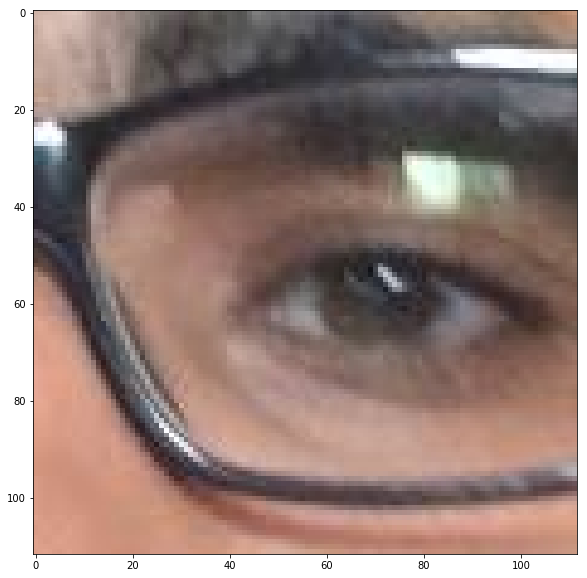

In [56]:
# load image left eye
left_eye = caffe.io.load_image('appleLeftEye00003/00070.jpg')
transformed_image_left = transformer_image_left.preprocess('image_left', left_eye)
plt.imshow(left_eye)
print(transformed_image_left)

In [57]:
# load facegrid
facegrid = scipy.io.loadmat('facegrid00003.mat')['labelFaceGrid'].T
print(np.reshape(facegrid, (25, 25)))

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 

In [58]:
# copy the image data into the memory allocated for the net
net.blobs['image_face'].data[...] = transformed_image_face
net.blobs['image_right'].data[...] = transformed_image_right
net.blobs['image_left'].data[...] = transformed_image_left
net.blobs['facegrid'].data[...] = np.reshape(facegrid, (625,1,1))

In [59]:
### perform classification
output = net.forward()


In [60]:
print(output['fc3'])

[[-0.02028403 -6.417798  ]]
